# Résolution d'équations non linéaires

Importation des packages de calcul scientifique pour Python 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dans ce TP, on va mettre en oeuvre les méthodes vues en cours pour la résolution d'équations non linéaires du type

$$
F(x) = 0,
$$

où $F$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}$. Ces méthodes sont au nombre de 3: la méthode de dichotomie, la méthode du point fixe et la méthode de Newton. Nous allons nous intéresser au cas où la fonction $F$ est donnée par

$$
F(x) = 10^{-1}x^2 - \cos(x/2)-e^{-x/4}.
$$

## Graphe de $F$ et localisation grossière des racines

Afin de se faire une idée de la fonction (et de ses racines), on se propose tout d'abord de tracer le graphe de $F$. Pour cela, on commence par implémenter la fonction $F$ qui prendra en entrée un vecteur $x$ et donnera en sortie un vecteur $y$ de même taille que $x$ et tel que, pour tout indice $k$,

$$
y_k = F(x_k).
$$

Ensuite, on trace le graphe de $F$ à l'aide de la fonction `plt.plot` sur l'intervalle $[-10,10]$ avec un millier de points.

> **À faire **: Implémenter la fonction $F$ et tracer son graphe. Donner un intervalle de longueur $1$ autour de chaque racine $F$ dans l'intervalle $[-10,10]$.

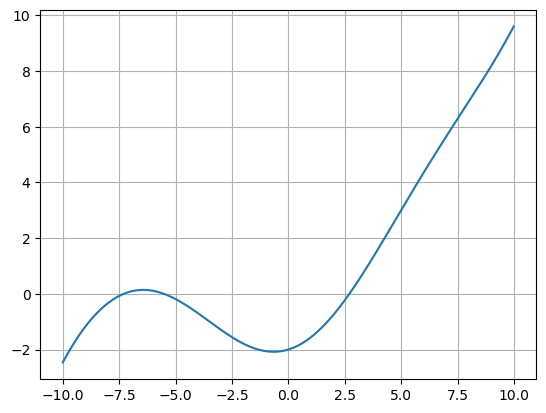

In [5]:
def F(x):
    return 0.1*np.power(x,2)-np.cos(x/2) - np.exp(-x/4)
a = -10
b = -a
c = abs(a - b) / 1000
x = np.arange(a, b, c)
plt.plot(x,F(x))
plt.grid()

> **Réponse **:...

## Méthode de dichotomie

On passe maintenant au calcul de racines par la méthode de dichotomie. Pour cela, on va implémenter une fonction `Dichotomie` qui aura comme arguments d'entrée:

- une fonction `F` dont on cherche une racine,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle initial,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de la dichotomie. Tester celle-ci sur la fonction $F$ avec comme intervalle initial $[-10,10]$ puis calculer la plus grande racine de $F$ sur l'intervalle $[-10,10]$ à une précision de $10^{-12}$.

In [47]:
def Dichotomie(F, a, b, eps = 1e-10, itermax = 100):
    X = np.array([])
    if F(a)*F(b) > 0:
        raise("les valeurs sont du meme signe")
    for i in range(itermax):
        mid = (a+b)/2
        X = np.append(X, mid)
        if np.abs(F(mid)) < eps :
            return X, i
        if F(mid) > 0:
            b = mid
        else:
            a = mid
                
    return X,itermax

print(Dichotomie(F,-10,10,1e-12))

(array([0.        , 5.        , 2.5       , 3.75      , 3.125     ,
       2.8125    , 2.65625   , 2.734375  , 2.6953125 , 2.71484375,
       2.70507812, 2.70019531, 2.69775391, 2.69897461, 2.69958496,
       2.69927979, 2.6991272 , 2.69920349, 2.69924164, 2.69926071,
       2.69927025, 2.69927502, 2.6992774 , 2.69927621, 2.69927561,
       2.69927531, 2.69927546, 2.69927539, 2.69927543, 2.69927545,
       2.69927545, 2.69927546, 2.69927546, 2.69927546, 2.69927546,
       2.69927546, 2.69927546, 2.69927546, 2.69927546, 2.69927546,
       2.69927546, 2.69927546, 2.69927546, 2.69927546]), 43)


## Méthode du point fixe

À présent, on va implémenter la méthode du point fixe. On implémentera pour cela une fonction `Point_fixe` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` correspondant à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle où évaluer la dérivée,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Calculer la dérivée de la fonction $F$ et implémenter sous une fonction `Fp`. Puis implémenter la méthode du point fixe. Cette méthode peut s'écrire sous la forme suivante
$$
\left\{\begin{array}{ll}
x_0\in I = [a,b]\textrm{ tel que la racine recherchée est dans $I$ et $F$ est monotone sur $I$},\\
M = \left\{\begin{array}{ll}\sup_{y\in I} F'(y),\textrm{ si $F$ est croissante sur $I$}\\\\inf_{y\in I} F'(y),\textrm{ si $F$ est décroissante sur $I$}
\end{array}\right.\\
x_{k+1} = x_k - \frac{F(x_k)}{M},\quad k\geq 0.
\end{array}\right.
$$

In [50]:
def Fp(x):
    return (0.8*x+np.exp(-x/4) + 2*np.sin(x/2))/4

def Point_fixe(F, Fp, x_0, a, b, eps = 1e-10, itermax = 100):
    if not( a <= x_0 <= b):
        raise("x_0 pas dans intervalle")
    X=np.array([x_0])
    precision = 100
    M = Fp(b)
    if Fp(X[-1]) > 0:
        for i in range(precision):
            v = Fp(a*(i/precision)+b*(precision-i)/precision)
            #v = Fp(a+i*(b-a)/precision)
            if v > M:
                M = v
    else:
         for i in range(precision):
            v = Fp(a*(i/precision)+b*(precision-i)/precision)
            if v < M:
                M = v
    for k in range(itermax):
        X = np.append(X, X[-1]-F(X[-1])/M)
        if np.abs(F(X[-1])) < eps:
            return X, k+1

    
    return X,itermax

> **À faire **:  Ensuite, tester la méthode du point fixe sur la fonction $F$ avec comme valeur initiale $0$ et sur l'intervalle $[0,5]$.

In [51]:
Point_fixe(F,Fp,0,0,5)

(array([0.        , 1.45657066, 2.35159621, 2.63366053, 2.68849977,
        2.69755442, 2.69900185, 2.699232  , 2.69926856, 2.69927437,
        2.69927529, 2.69927543, 2.69927546, 2.69927546, 2.69927546,
        2.69927546]),
 15)

## Méthode de Newton

On passe enfin à la méthode de Newton. On implémentera pour cela une fonction `Newton` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` qui correspond à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de Newton. Tester cette dernière avec comme condition initiale $x_0 = -3$.

In [52]:
def Newton(F, Fp, x_0, eps = 1e-10, itermax = 100):
    X = np.array([x_0])
    for k in range(itermax):
            X = np.append(X,X[-1] - F(X[-1])/Fp(X[-1]))            
            if np.abs(F(X[-1])) < eps:
                return X, k+1
    return X,itermax

Newton(F,Fp, 2)

(array([2.        , 2.76805576, 2.69971569, 2.69927548, 2.69927546]), 4)

## Comparaison des méthodes

Dans cette dernière section, on va comparer les méthodes et notamment la vitesse de convergence de celle-ci. Tout d'abord, on va calculer chacune des racines de $F$ avec une précision de $10^{-15}$ à l'aide de la méthode de votre choix. On note $x^*_i$ la $i$-ème racine de $F$ obtenue de cette manière. Ensuite, on va tracer l'évolution, pour chaque méthode et pour chaque racine de $F$, de l'erreur:

$$
e_n^{(k)} = \log_{10} (|x_n-x_k^*|),
$$
pour $n$ allant de $0$ jusqu'au nombre total d'itérations de chaque méthode. 


> **À faire **: Tracer, pour chaque racine, l'évolution de $e_n^{(k)}$ pour chaque méthode sur un même graphique. Les conditions initiales seront $x_0 = -7, -5$ et $2$. Pour la méthode de la dichotomie, on commencera avec un intervalle de taille $1$ tel que $a$ ou $b$ est égal à $x_0$. L'évaluation du paramètre $M$ pour la méthode du point fixe se fera sur le même intervalle que l'intervalle de départ de la dichotomie. Le paramètre `eps` sera fixé à $10^{-12}$. Commenter le résultat.

/tmp/ipykernel_2680/2160486080.py:3: RuntimeWarning: divide by zero encountered in log10
  err = np.log10(np.abs(D[0][0:-1]-D[0][-1]))


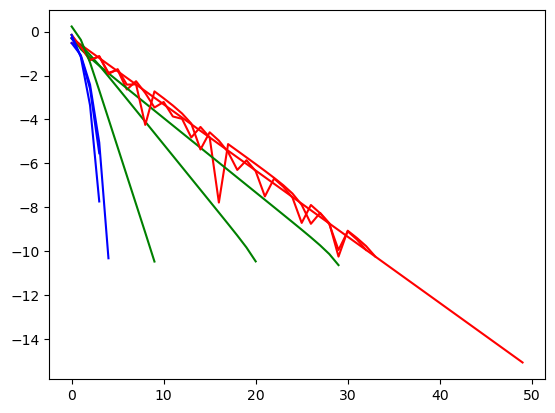

In [64]:
def TestDicho(F,a,b,eps):
    D = Dichotomie(F,a,b,eps)
    err = np.log10(np.abs(D[0][0:-1]-D[0][-1]))
    return err

def TestPointFixe(F,a,b,eps):
    PF = Point_fixe(F,Fp,a, a, b, eps)
    err = np.log10(np.abs(PF[0][0:-1]-PF[0][-1]))
    return err

def TestNewton(F,Fp,x,eps):
    N = Newton(F,Fp,x,eps)
    err = np.log10(np.abs(N[0][0:-1]-N[0][-1]))
    return err

eps=10e-12

def Tests(F,Fp,a,b,x,eps):
    plt.plot(TestDicho(F,a,b,eps), color="red")
    plt.plot(TestPointFixe(F,a,b,eps), color="green")
    plt.plot(TestNewton(F,Fp,x, eps), color="blue")
    
Tests(F,Fp, -8,-6,-7,eps)
Tests(F,Fp, -6,-5,-5,eps)
Tests(F,Fp, 1,3,2,eps)